# Deep Learning
## Summative assessment
### Coursework 1: MLPs and Backpropagation

#### Instructions

This coursework is released on **Wednesday 31st January 9.00** and is due by **Wednesday 7th February 23.59**. It is worth **10%** of your overall mark. There are 3 questions in this assessment, worth a total of 90 marks. A further 10 marks are awarded for good code quality, clarity and presentation. **You should attempt to answer all questions.** 

This assessment mainly assesses your understanding of the multilayer perceptron model and the backpropagation algorithm, as well as your ability to use the high-level Keras API.

You can make imports as and when you need them throughout the notebook, and add code cells where necessary. Make sure your notebook executes correctly in sequence before submitting.

#### Submission instructions

Ensure your notebook executes correctly in order. Save your notebook .ipynb file **after you have executed it** (so that outputs are all showing). It is recommended to also export a PDF file of your executed notebook. Upload a zip file containing your notebook (and separate PDF file) to Coursera by the deadline above.

In [1]:
# You will need the following imports for this assessment. 
# #You can make additional imports when you need them

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Activation
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical

### Question 1 (Total 30 marks)

a) Load the Boston housing dataset using the Keras API, with a 75/25 train/validation split. 

Standardise the input features by subtracting the mean and dividing by the standard deviation, where the per-feature statistics are computed from the training dataset. You can use numpy or sklearn for this part if you wish.

Load the data into `tf.data.Dataset` objects, shuffle and batch the datasets with a batch size of 32. Print out the `element_spec` of one of the Datasets. 

**(5 marks)**

In [2]:
# Load the Boston housing dataset
from tensorflow.keras.datasets import boston_housing

    
(boston_features, boston_labels), (x_test, y_test) = \
    boston_housing.load_data()

# Split into train and validation sets
features_train, features_val, labels_train, labels_val = \
    train_test_split(
    boston_features, boston_labels, test_size=0.25, 
    random_state=42
)

# Standardize the features using only the training data
scaler = StandardScaler()
features_train_scaled = scaler.fit_transform(features_train)
features_val_scaled = scaler.transform(features_val)

# Create tf.data.Dataset objects
train_dataset = tf.data.Dataset.from_tensor_slices((\
    features_train_scaled, labels_train))
validation_dataset = tf.data.Dataset.from_tensor_slices((\
    features_val_scaled, labels_val))

# Shuffle and batch the datasets
train_dataset = train_dataset.shuffle(buffer_size=\
    len(features_train)).batch(32)
validation_dataset = validation_dataset.batch(32)

# Print out the `element_spec` of one of the Datasets
print(train_dataset.element_spec)


(TensorSpec(shape=(None, 13), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))


b) Create a TensorFlow `Sequential` model object according to the following spec:

* The model should have 2 hidden layers, with 32 and 16 neurons respectively
* Each hidden layer should use a 'swish' activation

The model should be an multilayer perceptron (MLP) model suitable for regression on the Boston housing dataset.

Train the model for 300 epochs using the training Dataset object, but terminate the training if the validation mean absolute error (MAE) doesn't improve after 30 epochs. Use the stochastic gradient descent (SGD) optimizer with Nesterov momentum, with the momentum hyperparameter set to 0.9, and a learning rate of $10^{-3}$. You should use the high-level Keras API (using `compile`, `fit` methods) for this. The model should be trained with a mean squared error (MSE) loss function. The mean absolute error should also be computed and recorded on the training and validation sets.

Plot the MSE and MAE learning curves for training and validation sets, and compute the MSE loss and MAE on the validation set for the best set of model parameters (according to the validation set MAE).

**(15 marks)**

Epoch 1/300
10/10 [==============================] - 0s 8ms/step - loss: 500.8671 - mean_absolute_error: 20.0420 - val_loss: 235.7174 - val_mean_absolute_error: 12.5556
Epoch 2/300
10/10 [==============================] - 0s 824us/step - loss: 93.8371 - mean_absolute_error: 7.0770 - val_loss: 39.5857 - val_mean_absolute_error: 4.5908
Epoch 3/300
10/10 [==============================] - 0s 877us/step - loss: 34.9949 - mean_absolute_error: 4.0067 - val_loss: 18.1562 - val_mean_absolute_error: 3.3054
Epoch 4/300
10/10 [==============================] - 0s 912us/step - loss: 20.9956 - mean_absolute_error: 3.2274 - val_loss: 13.8056 - val_mean_absolute_error: 2.8175
Epoch 5/300
10/10 [==============================] - 0s 2ms/step - loss: 17.3295 - mean_absolute_error: 2.8841 - val_loss: 14.4157 - val_mean_absolute_error: 2.8780
Epoch 6/300
10/10 [==============================] - 0s 922us/step - loss: 14.9378 - mean_absolute_error: 2.7687 - val_loss: 11.4944 - val_mean_absolute_error: 2.487

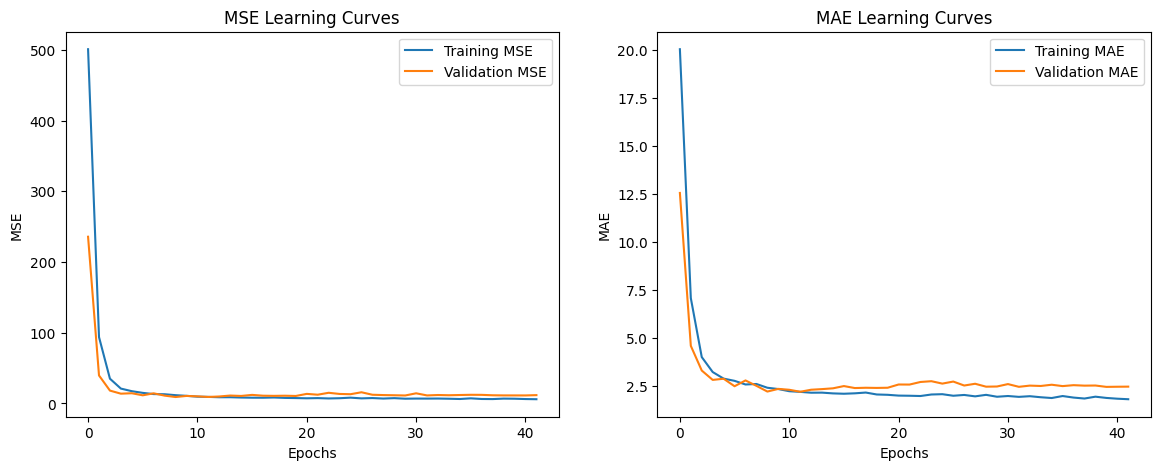

Validation MSE: 9.16053581237793
Validation MAE: 2.199040651321411


In [3]:
# Define the Sequential model
model = Sequential([
    Dense(32, activation='swish', input_shape=\
        (features_train_scaled.shape[1],)),
    Dense(16, activation='swish'),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(
    optimizer=SGD(learning_rate=1e-3, momentum=0.9, nesterov=True),
    loss='mean_squared_error',
    metrics=['mean_absolute_error']
)

# Define EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_mean_absolute_error',
    patience=30,
    restore_best_weights=True
)

# Train the model
history = model.fit(
    train_dataset,
    epochs=300,
    validation_data=validation_dataset,
    callbacks=[early_stopping],
    verbose=1
)

# Plot the learning curves
plt.figure(figsize=(14, 5))

# Plot MSE
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training MSE')
plt.plot(history.history['val_loss'], label='Validation MSE')
plt.title('MSE Learning Curves')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()

# Plot MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mean_absolute_error'], 
         label='Training MAE')
plt.plot(history.history['val_mean_absolute_error'], 
         label='Validation MAE')
plt.title('MAE Learning Curves')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.show()

# Evaluate the model on the validation set
val_mse, val_mae = model.evaluate(validation_dataset, 
                                  verbose=0)
print(f"Validation MSE: {val_mse}")
print(f"Validation MAE: {val_mae}")


c) What do you expect would be the effect of training the same model architecture on the Boston housing dataset where the input features have not been standardised? Briefly justify your answer. 

**(5 marks)**

**Convergence Speed:** Due to varied feature scales, gradient descent will take longer to converge, as larger scale features dominate the gradient.

**Training Difficulty:** Weights for smaller scale features require larger adjustments, making the training process less stable.

**Model Performance:** The model might become overly sensitive to large scale features, leading to poor performance.

**Interpretability Issues:** Coefficients become harder to interpret in linear models due to differing feature scales.

**Generalization:** The model may not generalize well to new data with different scales or distributions.

d) In terms of the computations carried out, describe in a few sentences what the differences would be (if any) between standardising the input features as above, and inserting a batch normalisation layer before the first dense layer of the model. 

**(5 marks)**

**Standardization of Input Features:** This is a preprocessing step applied to the entire dataset before training. It involves scaling the features so that they have a mean of zero and a standard deviation of one, based on the statistics (mean and standard deviation) of the training data. This is a static process, meaning once the parameters (mean and standard deviation) are calculated, they don't change during training or inference.

**Batch Normalization Layer:** This is a part of the model architecture. Batch normalization normalizes the input of each mini-batch to have a mean of zero and a standard deviation of one, but it does this during training, dynamically. The layer also introduces additional parameters (scale and shift) that are learned during training. Unlike static standardization, batch normalization maintains and updates statistics (mean and variance) during training, and uses population statistics during inference.

In summary, while both techniques normalize data, standardization is a one-time preprocessing step using fixed statistics, whereas batch normalization is an integral, trainable part of the model that adjusts its parameters continuously during training.

### Question 2 (Total 30 marks)

In this question you will empirically study the post-activation statistics in the hidden layers of an MLP model under different initialisation strategies. 

Consider an MLP model with 5 hidden layers with 8192, 8192, 8192, 4096 and 4096 neurons respectively. Each hidden layer uses a tanh activation function. Let $\mathbf{W}^{(k)}\in\mathbb{R}^{n_{k+1}\times n_k}$ and $\mathbf{b}^{(k)}\in\mathbb{R}^{n_{k+1}}$ denote the weight matrix and bias vector that map from hidden layer $k$ to hidden layer $k+1$ according to the following:

$$
\begin{align}
\mathbf{h}^{(k)} &= \tanh\left( \mathbf{W}^{(k-1)}\mathbf{h}^{(k-1)} + \mathbf{b}^{(k-1)} \right),\qquad k=1,\ldots, 5,
\end{align}
$$

where $\mathbf{h}^{(0)} \in \mathbb{R}^{1024}$ denotes the input layer, $n_k$ is the number of neurons in hidden layer $k$, and the tanh function is applied elementwise. Suppose the input features ${h}_i^{(0)}$ are each independently sampled from $N(0, \frac{1}{2})$.

a) Compute the (post-)activations of each hidden layer after passing a single input example through the network (where the input example is sampled as described above), and save them in a variable called `layer_activations`. The following initialisation strategy should be used for the model parameters:

1. Each element in each weight matrix $\mathbf{W}^{(k)}\in\mathbb{R}^{n_{k+1}\times n_k}$ is sampled from a standard normal distribution
2. Each bias vector $\mathbf{b}^{(k)}\in\mathbb{R}^{n_{k+1}}$ is initialised to zero
    
Your answer for this part should use only TensorFlow objects and functions, and not use numpy or scipy at all. You can make use of the Keras module if you wish. Weight and bias parameters should be implemented with TF Variable objects.

**(10 marks)**

In [4]:
# Define layer sizes
layer_sizes = [1024, 8192, 8192, 8192, 4096, 4096]

# Initialize weights and biases
weights = [tf.Variable(tf.random.normal(\
    [layer_sizes[k+1], layer_sizes[k]])) for k in range(5)]
biases = [tf.Variable(tf.zeros([layer_sizes[k+1]])) \
    for k in range(5)]

# Function to compute layer activations
def compute_activations(input_example):
    h = input_example
    layer_activations = []
    for k in range(5):
        h = tf.matmul(weights[k], h)
        h = tf.add(h, tf.reshape(biases[k], \
            [layer_sizes[k+1], 1]))
        h = tf.tanh(h)
        layer_activations.append(h)

    return layer_activations

# Generate an input example
input_example = tf.random.normal([1024, 1], mean=0.0, \
    stddev=tf.sqrt(0.5))

# Compute activations
layer_activations = compute_activations(input_example)


b) Create a plot for the normalised (density) histograms for the activation statistics in each of the hidden layers. Briefly comment on the result.

**(5 marks)**

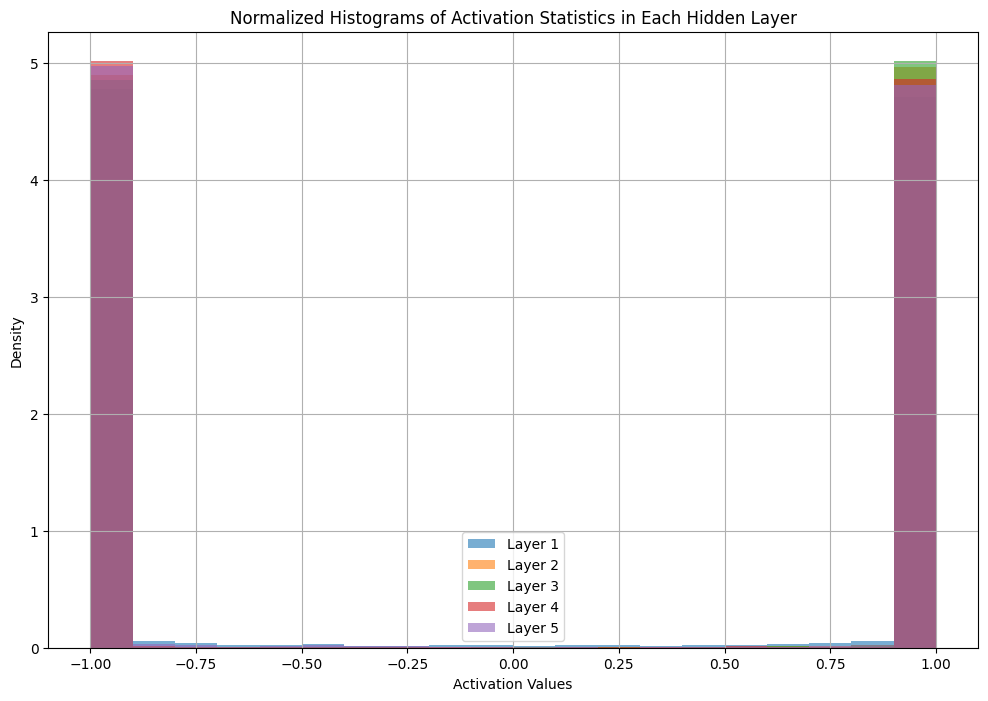

In [5]:
# Assuming layer_activations is a list of activations for each layer
plt.figure(figsize=(12, 8))

for i, activation in enumerate(layer_activations):
    # Flatten the activations and plot their histogram
    plt.hist(activation.numpy().flatten(), bins=20, \
        density=True, alpha=0.6, label=f'Layer {i+1}')

plt.title('Normalized Histograms of Activation Statistics in Each Hidden Layer')
plt.xlabel('Activation Values')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

**Comment:**

The histograms show a concentration of activation values at the extremes of the tanh activation function's range, which are -1 and +1. This suggests that the activations are becoming saturated. Saturation of tanh means that a significant number of neurons are outputting values close to the maximum or minimum value of the tanh function, which are -1 and 1 respectively, which is indicative of a phenomenon known as the "vanishing gradients" problem, which is particularly problematic during backpropagation. As gradients are propagated back through the network, they can become increasingly small, eventually leading to very slow or stalled learning, since neurons that are saturated produce gradients close to zero. This can prevent weights from updating effectively during training.

The presence of this issue could be due to the large initial weights, which when multiplied by the inputs, push the activations to the saturating regions of the tanh function. This is a sign that the initialization strategy may not be appropriate for the network architecture and activation function used, as it leads to non-optimal activation distributions that can hinder learning.

c) Re-compute the activation statistics for the MLP under two different initialisation strategies:

1. Glorot normal distribution initialisation for the weights $\mathbf{W}^{(k)}\in\mathbb{R}^{n_{k+1}\times n_k}$ and zero initialisation for the bias $\mathbf{b}^{(k)}\in\mathbb{R}^{n_{k+1}}$ for $k=0,\ldots,4$
1. Glorot uniform distribution initialisation for the weights $\mathbf{W}^{(k)}\in\mathbb{R}^{n_{k+1}\times n_k}$ and zero initialisation for the bias $\mathbf{b}^{(k)}\in\mathbb{R}^{n_{k+1}}$ for $k=0,\ldots,4$

For each initialisation strategy above, plot normalised histograms for the activation statistics in each hidden layer.

**(10 marks)**

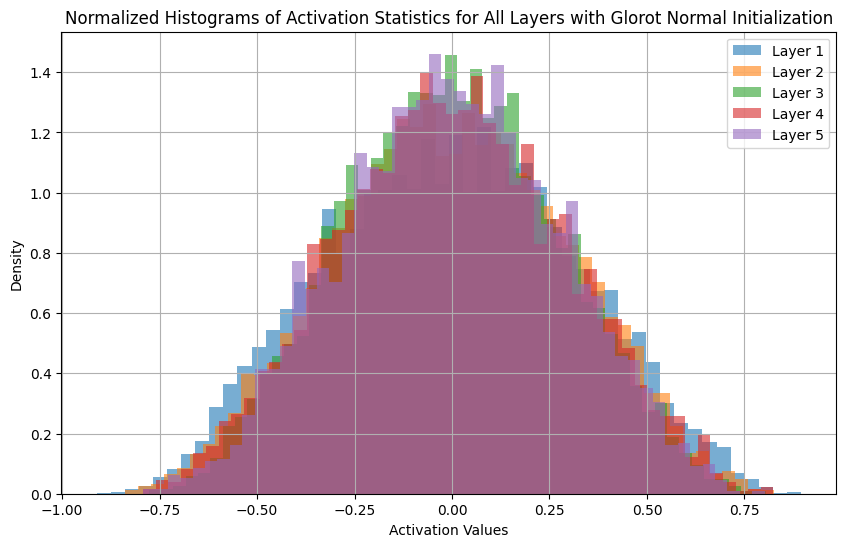

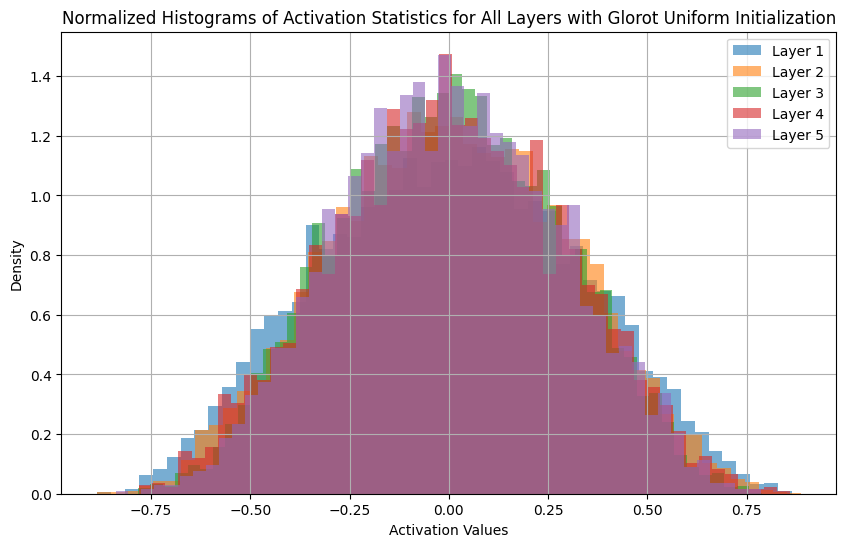

In [6]:
# Define the model architecture
layer_sizes = [1024, 8192, 8192, 8192, 4096, 4096]

# Function to initialize weights and biases using Glorot initialization
def initialize_parameters(glorot_type='normal'):
    weights = []
    biases = []
    for k in range(len(layer_sizes) - 1):
        if glorot_type == 'normal':
            initializer = tf.initializers.GlorotNormal()
        else:  # glorot_type == 'uniform'
            initializer = tf.initializers.GlorotUniform()
        
        weights.append(tf.Variable(initializer(shape=(
            layer_sizes[k+1], layer_sizes[k]))))
        biases.append(tf.Variable(tf.zeros(shape=(
            layer_sizes[k+1],))))
    return weights, biases

# Function to compute the activations
def compute_activations(input_features, weights, biases):
    h = input_features
    activations = []
    for k in range(len(weights)):
        z = tf.matmul(weights[k], h) + tf.reshape(
            biases[k], (-1, 1))
        h = tf.tanh(z)
        activations.append(h)

    return activations

# Generate a single input example
input_example = tf.random.normal(shape=(
    layer_sizes[0], 1), mean=0.0, stddev=tf.sqrt(0.5))

# Initialize parameters and compute activations for Glorot normal
glorot_normal_weights, glorot_normal_biases = \
    initialize_parameters('normal')
glorot_normal_activations = compute_activations(
    input_example, glorot_normal_weights, glorot_normal_biases)

# Initialize parameters and compute activations for Glorot uniform
glorot_uniform_weights, glorot_uniform_biases = \
    initialize_parameters('uniform')
glorot_uniform_activations = compute_activations(
    input_example, glorot_uniform_weights, glorot_uniform_biases)

# Function to plot the histograms separately
# def plot_histograms(activations, title):
#     plt.figure(figsize=(10, 8))
#     for i, activation in enumerate(activations):
#         plt.subplot(len(activations), 1, i+1)
#         plt.hist(activation.numpy().flatten(), bins=50, density=True, alpha=0.6)
#         plt.title(f'Layer {i+1}: {title}')
#         plt.xlabel('Activation Value')
#         plt.ylabel('Density')
#     plt.tight_layout()
#     plt.show()

def plot_histograms_together(activations, type):
    plt.figure(figsize=(10, 6))
    for i, activation in enumerate(activations):
        # Assuming activation is a 2D tensor, 
        # we flatten it to 1D for histogram plotting
        plt.hist(activation.numpy().flatten(), 
                 bins=50, density=True, alpha=0.6, label=f'Layer {i+1}')
    
    plt.title(f'Normalized Histograms of Activation Statistics for All Layers with {type}')
    plt.xlabel('Activation Values')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot histograms for Glorot normal initialisation
plot_histograms_together(glorot_normal_activations, 'Glorot Normal Initialization')

# Plot histograms for Glorot uniform initialisation
plot_histograms_together(glorot_uniform_activations, 'Glorot Uniform Initialization')


d) Comment on your interpretation of the results in the previous parts of this question, what implications there might be for the successful training of the MLP model, and any limitations of the empirical study carried out.

**(5 marks)**

The histograms for activations using Glorot normal and uniform initializations suggest the following:

- **Distributions are Centered**: The activations are not saturating, indicated by the bell-shaped curves centered around zero, which is beneficial for avoiding vanishing gradients.
  
- **Consistent Variance**: The variance of activations is similar across layers, suggesting that Glorot initialization is effective in preventing the exploding or vanishing gradients problem.

- **Training Implications**: The initial activation distributions are promising for successful training, with gradients likely to be propagated effectively due to non-saturated activations.

- **Study Limitations**: The study only examines initial activations for a single input and does not account for changes during training or the influence of other factors like learning rate or regularization.

- **Initialization Comparison**: Both Glorot initializations appear to perform similarly, at least at the start of training, for this network configuration and activation function.

The study suggests that both Glorot strategies are likely appropriate for the MLP model, but actual training behavior and other factors also heavily influence the success of the training process.

### Question 3 (Total 30 marks)

Consider the following MLP model, designed as an image classifier for the MNIST dataset:

$$
\begin{align}
\mathbf{h}^{(0)} &:= \mathbf{x}\\
\mathbf{h}^{(k)} &= \sigma\left( \mathbf{W}^{(k-1)}\mathbf{h}^{(k-1)} + \mathbf{b}^{(k-1)} \right),\qquad k=1,2\\
\hat{\mathbf{y}} &= \textrm{softmax}\left( \mathbf{W}^{(2)}\mathbf{h}^{(2)} + \mathbf{b}^{(2)} \right)
\end{align}
$$

where $\mathbf{x}\in\mathbb{R}^{784}$ is the flattened image input, $\mathbf{W}^{(k)}\in\mathbb{R}^{n_{k+1}\times n_k}$ and $\mathbf{b}^{(k)}\in\mathbb{R}^{n_{k+1}}$ ($k=0,1,2$) are the model weights and biases, and $n_k$ is the number of neurons in the $k$-th layer.

a) Construct this MLP model using the Sequential API. The model will have two hidden layers with 64 neurons each, using a sigmoid activation function, and take an input of shape `(28, 28)`. The output should be a 10-way softmax.

Load the MNIST dataset from the Keras API. Normalise the input pixel values to the interval $[0,1]$ and convert the labels to one-hot vectors. Do not shuffle the dataset. Save the training inputs and targets as Tensors `x_train` and `y_train` respectively. The validation/test partition can be discarded.

_Hint: you may find it helpful in later parts of this question to use separate Keras layers for the activation functions inside your model object._

**(5 marks)**

In [7]:
# Construct the MLP model using the Sequential API
model = Sequential([
    # Flatten the 28x28 image
    Flatten(input_shape=(28, 28)),  
    Dense(64),  # First hidden layer with 64 neurons
    Activation('sigmoid'),  # Sigmoid
    Dense(64),  # Second hidden layer with 64 neurons
    Activation('sigmoid'), # Sigmoid
    Dense(10),  # Output layer with 10 neurons for 10 classes
    Activation('softmax')  # Softmax
])

# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the input pixel values
x_train = x_train / 255.0

# Convert labels to one-hot vectors
y_train = to_categorical(y_train, 10)

# Convert the training inputs and targets to Tensors
x_train = tf.convert_to_tensor(x_train, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.float32)

b) Suppose that the loss function used to train the MLP is the categorical cross entropy loss function, and $L_i$ denotes the (scalar-valued) loss with respect to the $i$-th input example. Consider the pre-activations in the final layer, given by $\mathbf{a}^{(3)} =  \mathbf{W}^{(2)}\mathbf{h}^{(2)} + \mathbf{b}^{(2)}$. 

Show that the error $\delta^{(k)} := \frac{\partial L_i}{\partial \mathbf{a}^{(3)}}$ given by the derivative of the loss with respect to the final layer pre-activation values is given by $\hat{\mathbf{y}} - \mathbf{y}$, where $\hat{\mathbf{y}}$ is the output from the model, and $\mathbf{y}$ is the ground truth label, represented as a one-hot vector.

Write your answer below in Markdown. You do not need to write any code for this part.

**(7 marks)**

To show that the error $\delta^{(k)} := \frac{\partial L_i}{\partial \mathbf{a}^{(3)}}$ is given by $\hat{\mathbf{y}} - \mathbf{y}$, we can start with the categorical cross-entropy loss function and differentiate it with respect to the final layer pre-activations $\mathbf{a}^{(3)}$.

The categorical cross-entropy loss for a single example $i$ is given by:

$$
L_i = -\sum_{j} y_j \log(\hat{y}_j)
$$

where $y_j$ is the ground truth (one-hot encoded, so $y_j$ is 1 for the correct class and 0 for all others), and $\hat{y}_j$ is the predicted probability for class $j$, which is the $j$-th element of the softmax output $\hat{\mathbf{y}}$.

The softmax function for the $j$-th class is:

$$
\hat{y}_j = \frac{e^{a_j^{(3)}}}{\sum_{k} e^{a_k^{(3)}}}
$$

The derivative of the softmax function with respect to $a_j^{(3)}$ for the correct class ($y_j = 1$) is:

$$
\frac{\partial \hat{y}_j}{\partial a_j^{(3)}} = \hat{y}_j (1 - \hat{y}_j)
$$

And for the incorrect class ($y_j = 0$) is:

$$
\frac{\partial \hat{y}_j}{\partial a_j^{(3)}} = -\hat{y}_j \hat{y}_k \quad \text{for } j \neq k
$$

Now, taking the derivative of the loss with respect to the final pre-activation $a_j^{(3)}$:

$$
\frac{\partial L_i}{\partial a_j^{(3)}} = -\sum_{j} y_j \frac{1}{\hat{y}_j} \frac{\partial \hat{y}_j}{\partial a_j^{(3)}}
$$

For the correct class:

$$
\frac{\partial L_i}{\partial a_j^{(3)}} = -y_j \frac{1}{\hat{y}_j} \hat{y}_j (1 - \hat{y}_j) = \hat{y}_j - y_j
$$

For the incorrect classes, since $y_j = 0$:

$$
\frac{\partial L_i}{\partial a_j^{(3)}}  = \hat{y}_j = \hat{y}_j - y_j
$$

So for all classes combined, the error term is:

$$
\delta^{(k)} = \hat{\mathbf{y}} - \mathbf{y}
$$

This shows that the error $\delta^{(k)}$, the derivative of the loss with respect to the final layer pre-activations, is simply the difference between the predicted probabilities and the actual one-hot encoded class labels.

c) Write a function called `grads` that implements the backpropagation equations for this model to return the gradients of the categorical cross entropy loss function with respect to the parameters $\mathbf{W}^{(2)}$ and $\mathbf{b}^{(2)}$. This function should return these gradients as a list `[grads_W2, grads_b2]`, and it should take the following input arguments:

* `model`: your model object, defined using the Sequential API
* `inputs`: a Tensor of shape `(batch_size, 28, 28)`
* `y_true`: a Tensor of shape `(batch_size, 10)` containing the true labels as one-hot vectors

The function `grads` (and any other function it uses) should only use TensorFlow ops. In particular, it should not use automatic differentiation or other libraries (e.g. numpy).

You should make sure that your code is clearly written, and variables sensibly named. You might find it helpful to write separate helper functions to be used in the `grads` function.

 **(15 marks)**

In [8]:
def sigmoid(x):
    return 1 / (1 + tf.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def grads(model, inputs, y_true):
    # Flatten the inputs
    inputs = tf.reshape(inputs, [tf.shape(inputs)[0], -1])
    
    # Get the weights and biases from the model
    # First hidden layer weights and biases
    W0, b0 = model.layers[1].get_weights()
    # Second hidden layer weights and biases  
    W1, b1 = model.layers[3].get_weights()
    # Output layer weights and biases  
    W2, b2 = model.layers[5].get_weights()
    
    # Forward pass
    a1 = tf.matmul(inputs, W0) + b0
    h1 = sigmoid(a1)
    a2 = tf.matmul(h1, W1) + b1
    h2 = sigmoid(a2)
    a3 = tf.matmul(h2, W2) + b2
    y_pred = tf.nn.softmax(a3)

    # Compute the error at the output
    delta3 = y_pred - y_true
    
    # Backward pass for the output layer gradients
    grads_W3 = tf.matmul(tf.transpose(h2), delta3)
    grads_b3 = tf.reduce_sum(delta3, axis=0)
    delta2 = tf.matmul(delta3, tf.transpose(W2)) * sigmoid_derivative(h2)
    grads_W2 = tf.matmul(tf.transpose(h1), delta2)
    grads_b2 = tf.reduce_sum(delta2, axis=0)
    
    return [grads_W2, grads_b2]


d) Compute the gradients on the first 16 examples in the training set using your `grads` function and model. Print out the gradients that are computed. 

**(3 marks)**

In [9]:
# Select the first 16 examples from the training set
inputs = x_train[:16]
y_true = y_train[:16]

# Compute the gradients using the `grads` function
computed_grads = grads(model, inputs, y_true)

# Print out the gradients
print("Gradients for W2:", computed_grads[0].numpy())
print("Gradients for b2:", computed_grads[1].numpy())

Gradients for W2: [[-0.03997655  0.06855111  0.08018887 ... -0.08764415  0.06124438
  -0.0786681 ]
 [-0.04901352  0.07633971  0.07925843 ... -0.05175467  0.05521819
  -0.07210048]
 [-0.04261466  0.07003886  0.0452992  ... -0.06722275  0.05921125
  -0.05055618]
 ...
 [-0.03967883  0.0722633   0.06367961 ... -0.0702318   0.04746909
  -0.06778625]
 [-0.05155624  0.05681654  0.0507666  ... -0.03401186  0.06772331
  -0.06008317]
 [-0.0574522   0.07758602  0.05426082 ... -0.05802669  0.05728375
  -0.06177486]]
Gradients for b2: [-0.08885777  0.1260652   0.1129758   0.2651664   0.19409227  0.17376179
 -0.01702755  0.1432856   0.02384075  0.2103756   0.12458619 -0.19874191
  0.22584315  0.07535319 -0.12854847  0.26006553  0.37511325  0.20856908
 -0.09503839  0.02526949  0.35817498  0.4308593  -0.2043211  -0.02023893
 -0.12408859 -0.16939805 -0.01014456  0.22140816 -0.08950338 -0.28567982
  0.27508277  0.11728595 -0.15683298  0.09725709  0.21944207  0.32100767
 -0.01917941  0.1336952   0.344369